In [1]:
#steap 1: import packages , unfctions, and classes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#step 2 generate data
x = np.aran ape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1])
print(x.shape)
print(y.shape) 

(20, 1)
(20,)


In [63]:
#split data into train and test ((use test size = 0.25))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[ 4]
 [15]
 [ 2]
 [14]
 [ 1]
 [10]
 [19]
 [ 8]
 [ 9]
 [ 6]
 [ 7]
 [11]
 [ 0]
 [16]
 [13]]
[[ 3]
 [17]
 [18]
 [12]
 [ 5]]
[1 1 0 1 0 0 1 1 1 1 1 0 0 1 0]
[0 1 1 0 1]


In [31]:
#step 3 create a model and train it
model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C = 1.0, class_weight=None,dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None,max_iter=100,
                   multi_class='auto',n_jobs=None,penalty='l2',
                   random_state=0,solver='liblinear',tol=0.0001,verbose=0,
                   warm_start=False)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model?

In [32]:
#the attribute .classes_ represent the array of disticnt values that y takes
model.classes_

array([0, 1])

In [33]:
#step 4 evaluate the model
print('Intercept ',model.intercept_)
print('Slope ',model.coef_)

Intercept  [-0.34332993]
Slope  [[0.0982708]]


In [34]:
#prediction
model.predict(x_test)

array([1, 0, 1, 1, 1])

In [35]:
y_test

array([1, 0, 1, 1, 0])

In [36]:
#each row corresponds to a single observation
#the first column is the probability of the predicted output being zero, that is 1- p(x).
#the second column is the probability that the output is 1 or p(x).
model.predict_proba(x_test)

array([[0.19379387, 0.80620613],
       [0.56096001, 0.43903999],
       [0.1789004 , 0.8210996 ],
       [0.39106531, 0.60893469],
       [0.34538715, 0.65461285]])

In [37]:
model.score(x_test,y_test)

0.8

In [18]:
confusion_matrix(y_test,model.predict(x_test))

array([[1, 0],
       [1, 3]])

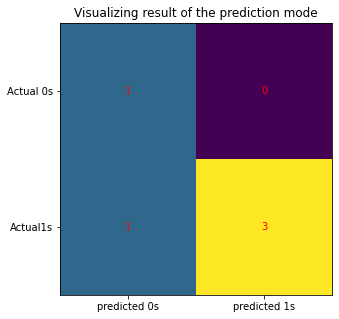

In [24]:
#visualize the confusion matrix
cm = confusion_matrix(y_test,model.predict(x_test))

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual1s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
  for j in range(2):
    ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.title("Visualizing result of the prediction mode")
plt.show()

In [38]:
#comprehensive report based on classifications
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [39]:
#improve model 
model = LogisticRegression(solver='liblinear',C=10.0,random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print('intercept ',model.intercept_)
print('slope',model.coef_)

intercept  [-0.65372866]
slope [[0.12560096]]


In [41]:
model.predict(x_test)

array([1, 0, 1, 1, 1])

In [42]:
model.score(x_test,y_test)

0.8

In [43]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'log', max_iter = 1000, alpha=0.001)
#n_iter = max_iter, alpha = tol
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('coefficients \n',clf.coef_)
print('y_intercept',clf.intercept_)
print('score',clf.score(x_test,y_test))


coefficients 
 [[25.99590008]]
y_intercept [-16.65054313]
score 0.6


In [44]:
clf.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [45]:
y_pred

array([1, 1, 1, 1, 1])

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

parameters={'loss':('log','hinge'),'penalty':('l2','l1','elasticnet'),
            'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1],
            'max_iter':[5000,1000,2000]}
model3 = SGDClassifier(random_state=5)
clf = GridSearchCV(model3,parameters)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=5,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('log', 'hinge'),
                         'max_iter': [5000, 1000, 2000],
                      

In [58]:
clf.estimator.get_params().keys()
#only to get the keys they have in the parameters

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [65]:
clf.best_params_

{'alpha': 1, 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'elasticnet'}

In [66]:
clf.best_estimator_.intercept_

array([-1.24022134])

In [67]:
clf.best_estimator_.coef_

array([[0.21170927]])

In [68]:
clf.best_score_

0.7999999999999999